# Exercises

The first exercise was to modify the first-order rate law code to account for a *y*-uncertainty of 5 %. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's create a new array with the *y*-uncertainty (`c_err`). 

In [2]:
c = np.array([6.23, 4.84, 3.76, 3.20, 2.60, 2.16, 1.85, 1.49, 1.27, 1.01])
c_err = c * 0.05
t = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

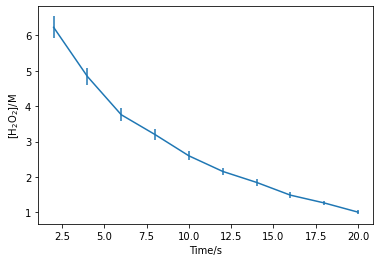

In [3]:
plt.errorbar(t, c, c_err)
plt.xlabel('Time/s')
plt.ylabel('[H$_2$O$_2$]/M')
plt.show()

Using the model from the example.

In [4]:
def first_order(t, a0, k):
    """
    The first-order rate equation. 
    
    Args:
        t (float): Time (s).
        a0 (float): Initial concentration (mol/dm3).
        k (float): Rate constant (s-1).
    
    Returns:
        (float): Concentration at time t (mol/dm3).
    """
    return a0 * np.exp(-k * t)

But with a modified chi_squared. 

In [5]:
def chi_squared(x, t, data, error):
    """
    Determine the chi-squared value for a first-order rate equation.
    
    Args:
        x (list): The variable parameters.
        t (float): Time (s).
        data (float): Experimental concentration data.
        error (float): Uncertainty in concentration data.
    Returns:
        (float): chi^2 value.
    """
    a0 = x[0]
    k = x[1]
    return np.sum((data - first_order(t, a0, k)) ** 2 / (error ** 2))

Then we do the minimisation as before. 
But with the `c_err` as an `arg` and starting positions informed by the previous analysis.

In [6]:
from scipy.optimize import minimize

In [7]:
result = minimize(chi_squared, [7, 0.1], args=(t, c, c_err))

In [8]:
result.x

array([7.08438447, 0.09737419])

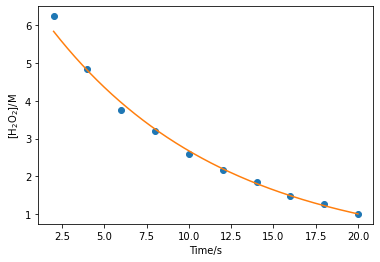

In [9]:
x = np.linspace(2, 20, 1000)

plt.plot(t, c, 'o')
plt.plot(x, first_order(x, result.x[0], result.x[1]))
plt.xlabel('Time/s')
plt.ylabel('[H$_2$O$_2$]/M')
plt.show()

This can also be achieved with the use of the `sigma` flag in the `scipy.optimize.curve_fit` function. 

In [10]:
from scipy.optimize import curve_fit

In [11]:
popt, pcov = curve_fit(first_order, t, c, sigma=c_err)

<ipython-input-4-ef183409b30e>:13: RuntimeWarning: overflow encountered in exp
  return a0 * np.exp(-k * t)


In [12]:
uncertainties = np.sqrt(pcov)

print(f"[A]_0 = {popt[0]} +/- {uncertainties[0][0]}; k = {popt[1]} +/- {uncertainties[1][1]}")

[A]_0 = 7.084387204820056 +/- 0.17113707059226657; k = 0.09737422484062833 +/- 0.0019530371481279994
